# Redes Neuronales - Dataset Idealista Madrid

En esta practica vamos a ver cómo crear un modelo de **redes neuronales** para poder predecir el valor de una vivienda, teniendo en cuenta datos de la página *Idealista* en Madrid.

## Paso 1: Descargar el dataset

Primeramente, vamos a descargar este dataset desde la página de *Kaggle*, para poder trabajar con él. El enlace es el siguiente

[Dataset](https://www.kaggle.com/datasets/kanchana1990/madrid-idealista-property-listings)

In [1045]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kanchana1990/madrid-idealista-property-listings")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Alumno_AI\.cache\kagglehub\datasets\kanchana1990\madrid-idealista-property-listings\versions\1


In [1046]:
import pandas as pd
import os

# List files in the directory to find CSV files
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
print("Available CSV files:", csv_files)

# Assuming there's a main CSV file we want to read
# If there are multiple files, you may need to select the specific one you want
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    print(f"Loaded {csv_files[0]}")
    print(f"Shape: {df.shape}")
    display(df.head())
else:
    print("No CSV files found in the directory.")

Available CSV files: ['idealista_madrid.csv']
Loaded idealista_madrid.csv
Shape: (915, 13)


,url,listingUrl,title,id,price,baths,rooms,sqft,description,address,typology,advertiserProfessionalName,advertiserName
0,https://www.idealista.com/inmueble/104027174/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Villanueva,104027174,1920000,3,3,183,Residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,Promora Madrid,Promora Madrid
1,https://www.idealista.com/inmueble/102321942/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Núñez de Balboa,102321942,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,Madrid MMC,Engel & Völkers Madrid
2,https://www.idealista.com/inmueble/103334142/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Conde Orgaz-Piovera,103334142,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,"Hortaleza, Madrid",Pisos,De Salas Consultores Inmobiliarios,De Salas Consultores Inmobiliarios
3,https://www.idealista.com/inmueble/104161987/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Nueva España,104161987,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,departamento comercial,Gilmar Viso - Chamartín
4,https://www.idealista.com/inmueble/103989666/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Claudio Coello,103989666,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,Walter Haus Salamanca,Walter Haus Madrid


## Paso 2: Visualización de los datos

In [1047]:
# Ver los valores mínimos y máximos de cada variable
print(df[['price', 'baths', 'rooms', 'sqft']].describe())



              price       baths       rooms         sqft
count  9.150000e+02  915.000000  915.000000   915.000000
mean   1.290575e+06    2.900546    3.474317   217.238251
std    1.036640e+06    1.626487    1.594625   191.745826
min    1.220000e+05    1.000000    0.000000    14.000000
25%    6.250000e+05    2.000000    2.000000   104.000000
50%    9.900000e+05    3.000000    3.000000   158.000000
75%    1.650000e+06    4.000000    4.000000   264.000000
max    8.900000e+06   12.000000   12.000000  1768.000000


## Paso 3: Limpieza de los datos

In [1048]:
df = df[['baths', 'rooms', 'address', 'sqft', 'typology', 'price']]

df['neighborhood'] = df['address'].str.split(',').str[0]
df = df.drop(columns=['address'])

df.head()

,baths,rooms,sqft,typology,price,neighborhood
0,3,3,183,Pisos,1920000,Recoletos
1,3,3,170,Pisos,1995000,Castellana
2,3,4,270,Pisos,1300000,Hortaleza
3,3,3,248,Pisos,1650000,Chamartín
4,3,3,116,Pisos,1590750,Recoletos


In [1049]:
import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# def generate_synthetic_real_estate_data(n_samples, df=df):
#     """
#     Genera datos sintéticos inmobiliarios realistas incluyendo precios
#     """
#     # 1. Analizar distribuciones originales
#     neighborhoods = df['neighborhood'].unique()
#     neighborhood_weights = df['neighborhood'].value_counts(normalize=True)
    
#     # Extraer valores únicos y probabilidades para typology
#     typology_values = ["Pisos", "Independientes"]
#     pisos_prob = (df['typology'] == "Pisos").mean()
    
#     # 2. Analizar correlaciones entre variables numéricas
#     numeric_cols = ['rooms', 'baths', 'sqft', 'price']
#     corr_matrix = df[numeric_cols].corr()
#     means = df[numeric_cols].mean().values
#     stds = df[numeric_cols].std().values
    
#     # 3. Generar datos correlacionados
#     cov = np.outer(stds, stds) * corr_matrix.values
#     chol = np.linalg.cholesky(cov)
    
#     uncorrelated = np.random.normal(size=(n_samples, len(numeric_cols)))
#     correlated = np.dot(uncorrelated, chol.T) + means
    
#     # 4. Crear DataFrame sintético
#     synthetic_data = pd.DataFrame()
    
#     # 5. Poblar con datos numéricos y asegurar restricciones realistas
#     synthetic_data['rooms'] = np.maximum(1, np.round(correlated[:, 0])).astype(int)
#     synthetic_data['baths'] = np.maximum(1, np.round(correlated[:, 1])).astype(int)  
#     synthetic_data['sqft'] = np.maximum(25, np.round(correlated[:, 2])).astype(int)
#     synthetic_data['price'] = np.maximum(50000, np.round(correlated[:, 3]/1000)*1000)  # Redondear a miles
    
#     # 6. Generar datos categóricos
#     synthetic_data['typology'] = np.random.choice(
#         typology_values, 
#         size=n_samples, 
#         p=[pisos_prob, 1-pisos_prob]
#     )
    
#     synthetic_data['neighborhood'] = np.random.choice(
#         neighborhoods, 
#         size=n_samples, 
#         p=neighborhood_weights
#     )
    
#     # 7. Añadir restricciones de sentido común
#     # Asegurar que apartamentos grandes tengan suficientes habitaciones
#     for i in range(len(synthetic_data)):
#         if synthetic_data.loc[i, 'sqft'] > 300 and synthetic_data.loc[i, 'rooms'] < 3:
#             synthetic_data.loc[i, 'rooms'] = np.random.randint(3, 6)
        
#         # Los baños nunca deben exceder el número de habitaciones + 1
#         if synthetic_data.loc[i, 'baths'] > synthetic_data.loc[i, 'rooms'] + 1:
#             synthetic_data.loc[i, 'baths'] = synthetic_data.loc[i, 'rooms'] if np.random.random() > 0.5 else synthetic_data.loc[i, 'rooms'] + 0.5
        
#         # Ajustar precio para casos extremos
#         if synthetic_data.loc[i, 'price'] < 100000 and synthetic_data.loc[i, 'sqft'] > 150:
#             synthetic_data.loc[i, 'price'] = np.random.randint(100000, 200000)
        
#         # Typology Independientes tiende a ser más caro
#         if synthetic_data.loc[i, 'typology'] == "Independientes" and synthetic_data.loc[i, 'price'] < df[df['typology'] == "Independientes"]['price'].median():
#             synthetic_data.loc[i, 'price'] *= 1.2
    
#     return synthetic_data

# # Generar datos sintéticos
# synthetic_df = generate_synthetic_real_estate_data(1000)

# # Mostrar los primeros registros
# print("Datos inmobiliarios sintéticos:")
# display(synthetic_df.head(10))

# df = pd.concat([df, synthetic_df], ignore_index=True)

# df.shape

In [1050]:
# yyyyyyyyyyyyyyyyyyyyyyyyyyyy77777777777777777777777777

In [1051]:
# Verificar valores nulos
print("Valores nulos en el dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Valores nulos en el dataset:
Series([], dtype: int64)


In [1052]:
df = df[
    (df['price'] > 0) &
    (df['baths'] > 0) &
    (df['rooms'] > 0) &
    (df['sqft'] > 10) &
    (df['neighborhood'].notnull()) &
    (df['typology'].notnull()) 
]

In [1053]:
from sklearn.ensemble import IsolationForest

# Seleccionar columnas numéricas
numerical_cols = ['price', 'baths', 'rooms', 'sqft']

# Crear y ajustar el modelo
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(df[numerical_cols])

# Filtrar el DataFrame para mantener solo los datos normales (predicción == 1)
df = df[outlier_pred == 1]

# Mostrar las primeras filas del DataFrame limpio
print("DataFrame limpio:")
print(f"Shape: {df.shape}")

DataFrame limpio:
Shape: (861, 6)


Una vez hemos visualizado los datos, vamos a pensar en cuáles de todos estos datos nos son verdaderamente útiles. Esta determinación viene principalmente con el pensamiento crítico de entender qué es lo realmente importante a la hora de crear y entrenar el modelo, por lo que, desde mi punto de vista estos son los campos clave:

- `price`

- `baths`

- `rooms`

- `address`

- `sqft`

- `typology`

Entre ellos, tenemos que entender que el campo `price` es el campo a predecir, por lo tanto lo asignaremos como `label` y el resto como `features`

In [1054]:
features = df.drop('price', axis=1).copy()

label = df['price'].copy()

print("Features shape:", features.shape)
print("Label shape:", label.shape)

Features shape: (861, 5)
Label shape: (861,)


In [1055]:
features.head()

,baths,rooms,sqft,typology,neighborhood
0,3,3,183,Pisos,Recoletos
1,3,3,170,Pisos,Castellana
2,3,4,270,Pisos,Hortaleza
3,3,3,248,Pisos,Chamartín
4,3,3,116,Pisos,Recoletos


In [1056]:
unique_neighborhoods = features['neighborhood'].nunique()
neighborhood_counts = features['neighborhood'].value_counts()

# Print summary
print(f"Total number of distinct neighborhoods: {unique_neighborhoods}")
print("\nNeighborhood distribution:")
print(neighborhood_counts)

Total number of distinct neighborhoods: 103

Neighborhood distribution:
neighborhood
Barrio de Salamanca           60
Chamartín                     53
Hortaleza                     53
Centro                        47
Moncloa                       38
                              ..
San Fermín                     1
Casco Histórico de Barajas     1
El Plantío                     1
Arganzuela                     1
San Juan Bautista              1
Name: count, Length: 103, dtype: int64


## Generación de datos sintéticos

## Feature engineering

In [1057]:
# features['sqft_per_room'] = features['sqft'] / features['rooms'] # Relación baños/habitaciones
# features['bath_per_room'] = features['baths'] / features['rooms']  # Espacio por habitación

features.head()

,baths,rooms,sqft,typology,neighborhood
0,3,3,183,Pisos,Recoletos
1,3,3,170,Pisos,Castellana
2,3,4,270,Pisos,Hortaleza
3,3,3,248,Pisos,Chamartín
4,3,3,116,Pisos,Recoletos


## Normalizando los datos

In [1058]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

address_vocab = features["neighborhood"].unique()
address_to_index = {address: idx for idx, address in enumerate(address_vocab)}
features["neighborhood"] = features["neighborhood"].map(address_to_index)

features = pd.get_dummies(features, columns=["typology"], prefix="typology")


columns_to_normalize = [col for col in features.columns 
                        if col != 'neighborhood' 
                        and 'typology_' not in col]

for col in columns_to_normalize:
    inf_count = np.isinf(features[col]).sum()
    nan_count = np.isnan(features[col]).sum()
    if inf_count > 0 or nan_count > 0:
        print(f"Columna {col}: {inf_count} infinitos, {nan_count} NaN")

# 2. Reemplazar infinitos y valores extremos antes de normalizar
for col in columns_to_normalize:
    # Reemplazar infinitos con NaN primero
    features[col] = features[col].replace([np.inf, -np.inf], np.nan)
    
    # Calcular límites razonables (por ejemplo, 3 desviaciones estándar)
    col_mean = features[col].mean()
    col_std = features[col].std()
    lower_bound = col_mean - 3 * col_std
    upper_bound = col_mean + 3 * col_std
    
    # Recortar valores extremos
    features[col] = features[col].clip(lower_bound, upper_bound)
    
    # Rellenar NaN con la mediana
    features[col] = features[col].fillna(features[col].median())

features[columns_to_normalize] = scaler.fit_transform(features[columns_to_normalize])


features.head()

,baths,rooms,sqft,neighborhood,typology_Independientes,typology_Pisos
0,1.0,0.0,0.217391,0,False,True
1,1.0,0.0,0.123188,1,False,True
2,1.0,0.5,0.847826,2,False,True
3,1.0,0.0,0.688406,3,False,True
4,1.0,0.0,-0.268116,0,False,True


In [1059]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el scaler
scaler_price = MinMaxScaler()

# Normalizar la columna 'price'
label_scaled = scaler_price.fit_transform(df['price'].values.reshape(-1, 1))


# Al final tendrás el vector normalizado de precios
print(label_scaled[:5]) 

[[0.38850475]
 [0.40471046]
 [0.2545376 ]
 [0.33016422]
 [0.31736171]]


Feature correlations with price (sorted):
price                      1.000000
sqft                       0.720920
baths                      0.710316
rooms                      0.553844
typology_Independientes    0.320301
typology_Pisos            -0.320301
Name: price, dtype: float64


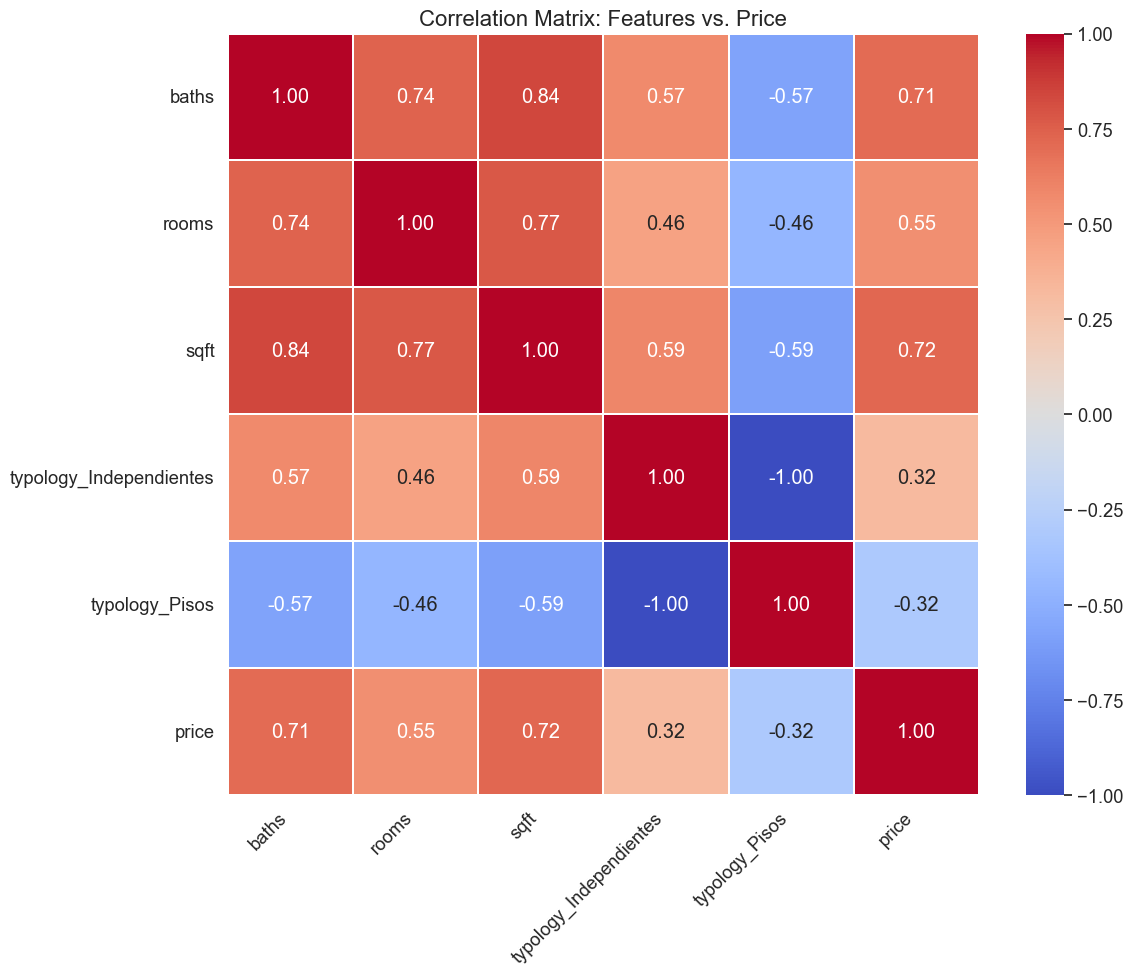

In [1060]:
# Create a copy of the features dataframe to avoid modifying the original
features_corr = features.copy()

columns_to_print = [col for col in features.columns 
                        if col != 'neighborhood']


# Combine numeric features with encoded categorical features
correlation_df = pd.concat([
    features_corr[columns_to_print],
    label
], axis=1)

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Create heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            linewidths=0.2)
plt.title('Correlation Matrix: Features vs. Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Print correlations with price (sorted)
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Feature correlations with price (sorted):")
print(price_correlations)

In [1061]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, Input, BatchNormalization
from tensorflow.keras.regularizers import l2, l1_l2
import tensorflow.keras as keras

In [1062]:
def create_embedding_model(vocab_size, embedding_dim):
    # Entrada para neighborhood
    neighborhood_input = Input(shape=(1,), name="neighborhood_input")
    
    # Capa de embedding
    embedding_layer = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        name="neighborhood_embedding"
    )(neighborhood_input)
    
    # Aplanar el embedding
    flatten = Flatten()(embedding_layer)
    
    # Capas para predecir el precio directamente desde el neighborhood
    x = Dense(32, activation='relu')(flatten)
    output = Dense(1, activation='linear', name="price_output")(x)
    
    # Crear y compilar modelo
    model = Model(inputs=neighborhood_input, outputs=output)
    model.compile(optimizer='adam', loss='mse')
    
    return model, embedding_layer

In [1063]:
neighborhood_count = len(address_vocab)
embedding_dim = 5

# Crear modelo de pre-entrenamiento
embedding_model, embedding_layer = create_embedding_model(neighborhood_count, embedding_dim)

# Preparar datos para el pre-entrenamiento
X_neighborhood = features['neighborhood'].values.reshape(-1, 1)

# Entrenar modelo de embeddings
print("Pre-entrenando embeddings de barrios...")
embedding_model.fit(
    X_neighborhood, 
    label_scaled,
    epochs=30, 
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Pre-entrenando embeddings de barrios...
Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0814 - val_loss: 0.0467
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0591 - val_loss: 0.0317
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - val_loss: 0.0231
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - val_loss: 0.0209
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0290 - val_loss: 0.0213
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - val_loss: 0.0209
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - val_loss: 0.0202
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - val_loss: 0.0197
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - val_loss: 0.0194
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0211 - val_loss: 0.0197
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - val_loss: 0.0198
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━

In [1064]:
embedding_weights = embedding_model.get_layer('neighborhood_embedding').get_weights()[0]
print(f"Forma de matriz de embeddings: {embedding_weights.shape}")

Forma de matriz de embeddings: (103, 5)


In [1065]:
embedding_cols = [f'neighborhood_emb_{i}' for i in range(embedding_dim)]
embedding_df = pd.DataFrame(
    np.stack([embedding_weights[idx] for idx in features['neighborhood']]),
    columns=embedding_cols
)

# Ver la forma
print(embedding_df.shape)

(861, 5)


In [1066]:
features.shape

(861, 6)

In [1067]:
features_reset = features.reset_index(drop=True)
embedding_df_reset = embedding_df.reset_index(drop=True)

features = pd.concat([features_reset, embedding_df_reset], axis=1)

features.head()

,baths,rooms,sqft,neighborhood,typology_Independientes,typology_Pisos,neighborhood_emb_0,neighborhood_emb_1,neighborhood_emb_2,neighborhood_emb_3,neighborhood_emb_4
0,1.0,0.0,0.217391,0,False,True,0.057643,-0.029276,0.123057,0.083184,-0.034511
1,1.0,0.0,0.123188,1,False,True,0.119216,-0.046295,0.072417,0.088465,-0.034695
2,1.0,0.5,0.847826,2,False,True,0.028198,-0.013982,0.080507,0.008356,-0.055989
3,1.0,0.0,0.688406,3,False,True,0.046632,-0.046407,0.088825,0.046078,-0.098952
4,1.0,0.0,-0.268116,0,False,True,0.057643,-0.029276,0.123057,0.083184,-0.034511


In [1068]:
print("features shape:", features.shape)
print("label_scaled shape:", label_scaled.shape)

features shape: (861, 11)
label_scaled shape: (861, 1)


In [1069]:
# # ==================== DATA AUGMENTATION ====================
# def augment_data(X, y, num_samples=1000):
#     np.random.seed(42)
    
#     # Interpolación entre puntos reales
#     idx1 = np.random.randint(0, len(X), num_samples)
#     idx2 = np.random.randint(0, len(X), num_samples)
    
#     alpha = np.random.uniform(0, 1, num_samples).reshape(-1, 1)
#     X_aug = alpha * X.iloc[idx1].values + (1 - alpha) * X.iloc[idx2].values
#     y_aug = alpha.flatten() * y.iloc[idx1].values + (1 - alpha.flatten()) * y.iloc[idx2].values
    
#     # Agregar ruido gaussiano
#     noise_X = np.random.normal(0, 0.01, X_aug.shape)
#     noise_y = np.random.normal(0, 0.01, y_aug.shape)
    
#     X_aug += noise_X
#     y_aug += noise_y
    
#     X_aug = pd.DataFrame(X_aug, columns=X.columns)
#     y_aug = pd.Series(y_aug, name=y.name)
    
#     return X_aug, y_aug

# # Aplicar aumentación
# label_scaled = pd.Series(label_scaled.flatten(), name='price')
# X_aug, y_aug = augment_data(features, label_scaled, num_samples=500)
# features = pd.concat([features, X_aug], axis=0)
# label_scaled = pd.concat([label_scaled, y_aug], axis=0)
 

In [1070]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label_scaled, test_size=0.2, random_state=42)

In [1071]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation="swish", kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation="swish", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(1, activation="linear")
])

# Compilamos el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss="mse", 
              metrics=["mae"])

In [1072]:
model.fit(
    X_train, 
    y_train,
    epochs=300,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/300


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4568 - mae: 1.2207 - val_loss: 0.9871 - val_mae: 0.6946
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2986 - mae: 1.1650 - val_loss: 0.3141 - val_mae: 0.3773
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0801 - mae: 1.1237 - val_loss: 0.2337 - val_mae: 0.3348
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8809 - mae: 1.0722 - val_loss: 0.2797 - val_mae: 0.4093
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9444 - mae: 1.0063 - val_loss: 0.3667 - val_mae: 0.5200
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7102 - mae: 0.9822 - val_loss: 0.4628 - val_mae: 0.6091
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6012 - mae: 0.9411 - val_loss: 0.5241 - val_mae: 0.6545
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6314 - mae: 0.9584 - val_loss: 0.5803 - val_mae: 0.6904
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4771 - mae: 0.

In [1073]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Convert predictions back to original scale
# y_pred_original = np.expm1(scaler_price.inverse_transform(y_pred))
# y_test_original = np.expm1(scaler_price.inverse_transform(y_test))

y_pred_original = scaler_price.inverse_transform(y_pred)
y_test_original = scaler_price.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

average_price = np.mean(y_test_original)

rmse_treshold = rmse / average_price * 100

print(f"RMSE: {rmse:.2f}")
print(f"RMSE threshold: {rmse_treshold:.2f}%")
print(f"R^2: {r2:.2f}")
print(f"Average price: {average_price:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE: 654499.71
RMSE threshold: 56.05%
R^2: 0.33
Average price: 1167770.80


In [1074]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0595 - mae: 0.1017 


[0.05719316750764847, 0.09866075217723846]

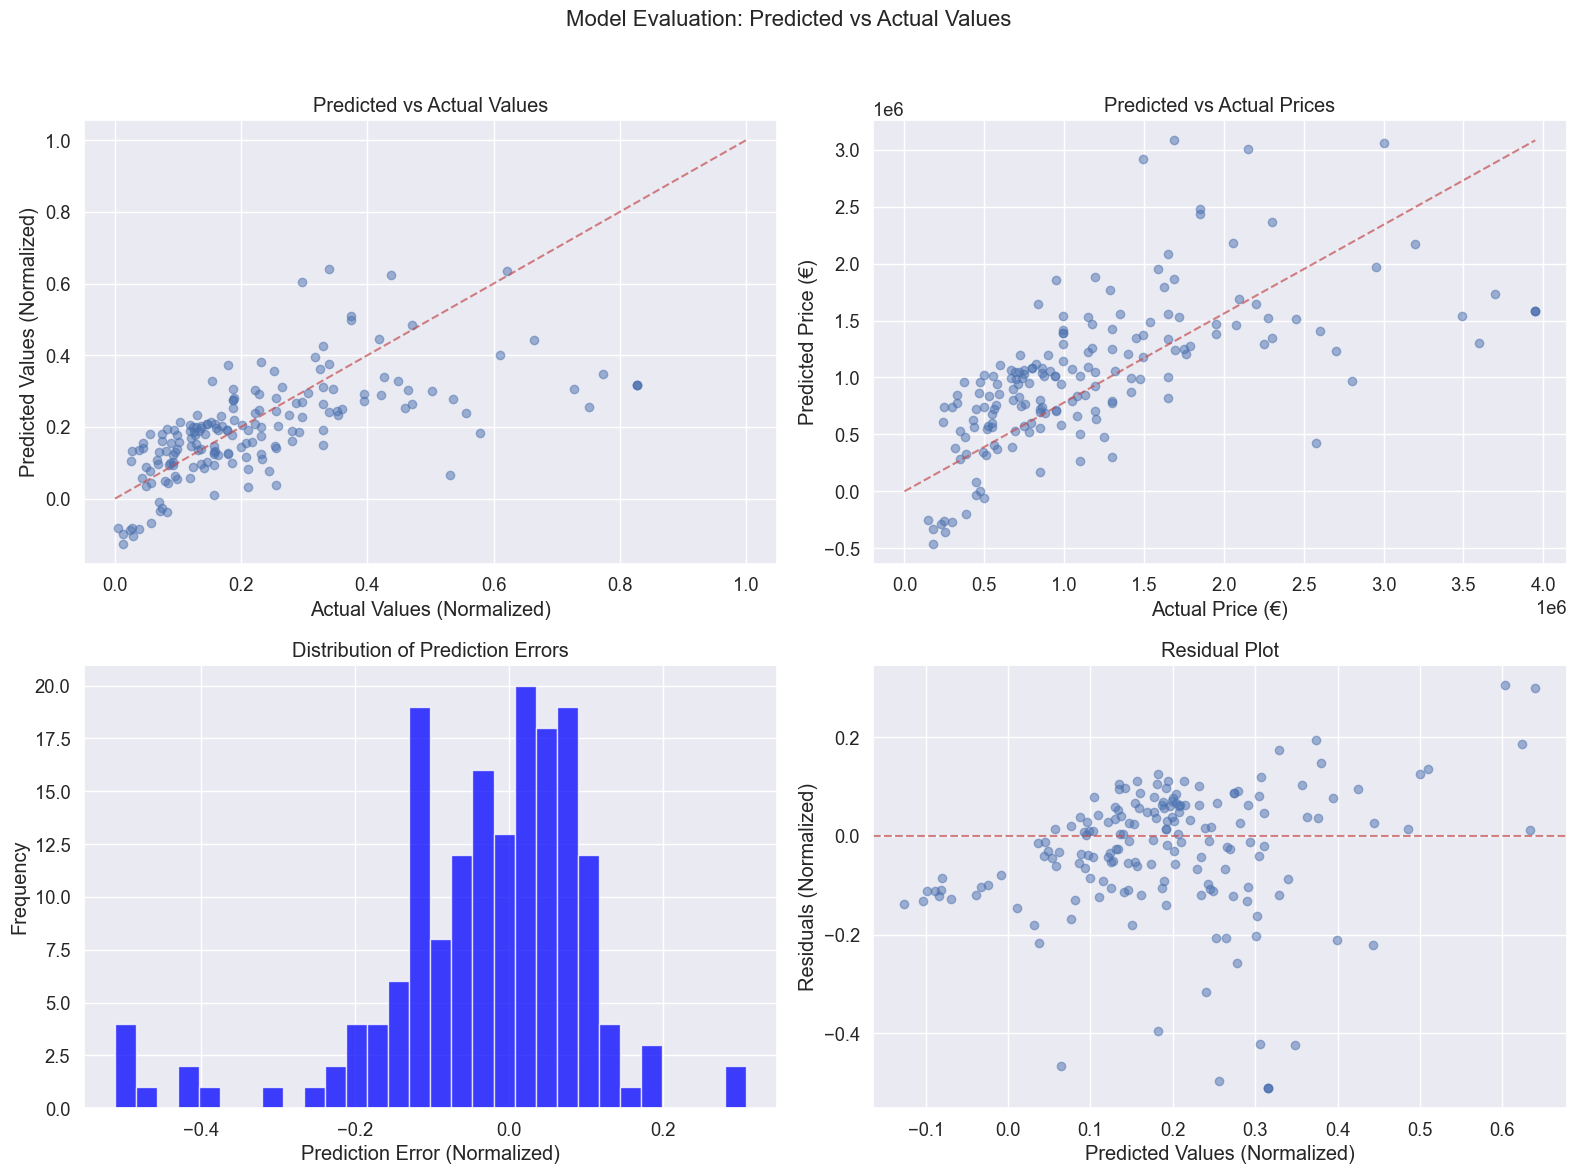

Error Statistics:
Mean Error: -0.032516956595669735
Standard Deviation of Error: 0.13763266440651434
Max Overestimation: 0.3070109833801421
Max Underestimation: -0.5112175781508407


In [1075]:
# Visualize model predictions vs actual values

# Create a figure with 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Evaluation: Predicted vs Actual Values', fontsize=16)

# 1. Scatter plot of predicted vs actual values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([0, 1], [0, 1], 'r--', alpha=0.7)  # Diagonal line representing perfect predictions
axes[0, 0].set_xlabel('Actual Values (Normalized)')
axes[0, 0].set_ylabel('Predicted Values (Normalized)')
axes[0, 0].set_title('Predicted vs Actual Values')

# 2. Scatter plot with original price values (not normalized)
axes[0, 1].scatter(scaler_price.inverse_transform(y_test), scaler_price.inverse_transform(y_pred), alpha=0.5)
axes[0, 1].plot([0, max(scaler_price.inverse_transform(y_test))[0]], [0, max(scaler_price.inverse_transform(y_pred))[0]], 'r--', alpha=0.7) 
axes[0, 1].set_xlabel('Actual Price (€)')
axes[0, 1].set_ylabel('Predicted Price (€)')
axes[0, 1].set_title('Predicted vs Actual Prices')

# 3. Histogram of errors
errors = y_pred - y_test
axes[1, 0].hist(errors, bins=30, alpha=0.75, color='blue')
axes[1, 0].set_xlabel('Prediction Error (Normalized)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors')

# 4. Residual plot
axes[1, 1].scatter(y_pred, errors, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='--', alpha=0.7)
axes[1, 1].set_xlabel('Predicted Values (Normalized)')
axes[1, 1].set_ylabel('Residuals (Normalized)')
axes[1, 1].set_title('Residual Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print summary statistics of errors
print("Error Statistics:")
print(f"Mean Error: {np.mean(errors)}")
print(f"Standard Deviation of Error: {np.std(errors)}")
print(f"Max Overestimation: {np.max(errors)}")
print(f"Max Underestimation: {np.min(errors)}")

In [1076]:
# Select one example from the test set
example_idx = 89  # You can change this to any index in the test set

# Get the features for this example and reshape for prediction
example_features = X_test[example_idx:example_idx+1]

# Make prediction using the trained model
example_pred = model.predict(example_features, verbose=0)

# Convert both prediction and actual value back to original scale
example_pred_orig = scaler_price.inverse_transform(example_pred)
example_actual_orig = scaler_price.inverse_transform(y_test[example_idx:example_idx+1])

# Print the results
print(f"Example #{example_idx}:")
print(f"Predicted price: €{example_pred_orig[0][0]:,.2f}")
print(f"Actual price:    €{example_actual_orig[0][0]:,.2f}")
print(f"Difference:      €{example_actual_orig[0][0] - example_pred_orig[0][0]:,.2f}")
print(f"Error (%):       {((example_actual_orig[0][0] - example_pred_orig[0][0]) / example_actual_orig[0][0] * 100):,.2f}%")

Example #89:
Predicted price: €576,952.50
Actual price:    €525,000.00
Difference:      €-51,952.50
Error (%):       -9.90%
